## Overview

This lab explores data collection and goes deeper into pandas and geopandas methods. The goal of this lab is to become more comfortable preparing tables and spatial datasets in Python in order to then visualize them.


## Premise

You have fled sleepy Schenectady, NY, and have somehow crossed the border into Quebec. You've begun working with a community group in Montreal who's mission is to better understand poverty and social isolation, and in so doing, to improve the livelihoods of Montrealers in the wake of a confluence of forces: gentrification, the housing crisis, lack of access to public transit, etc.

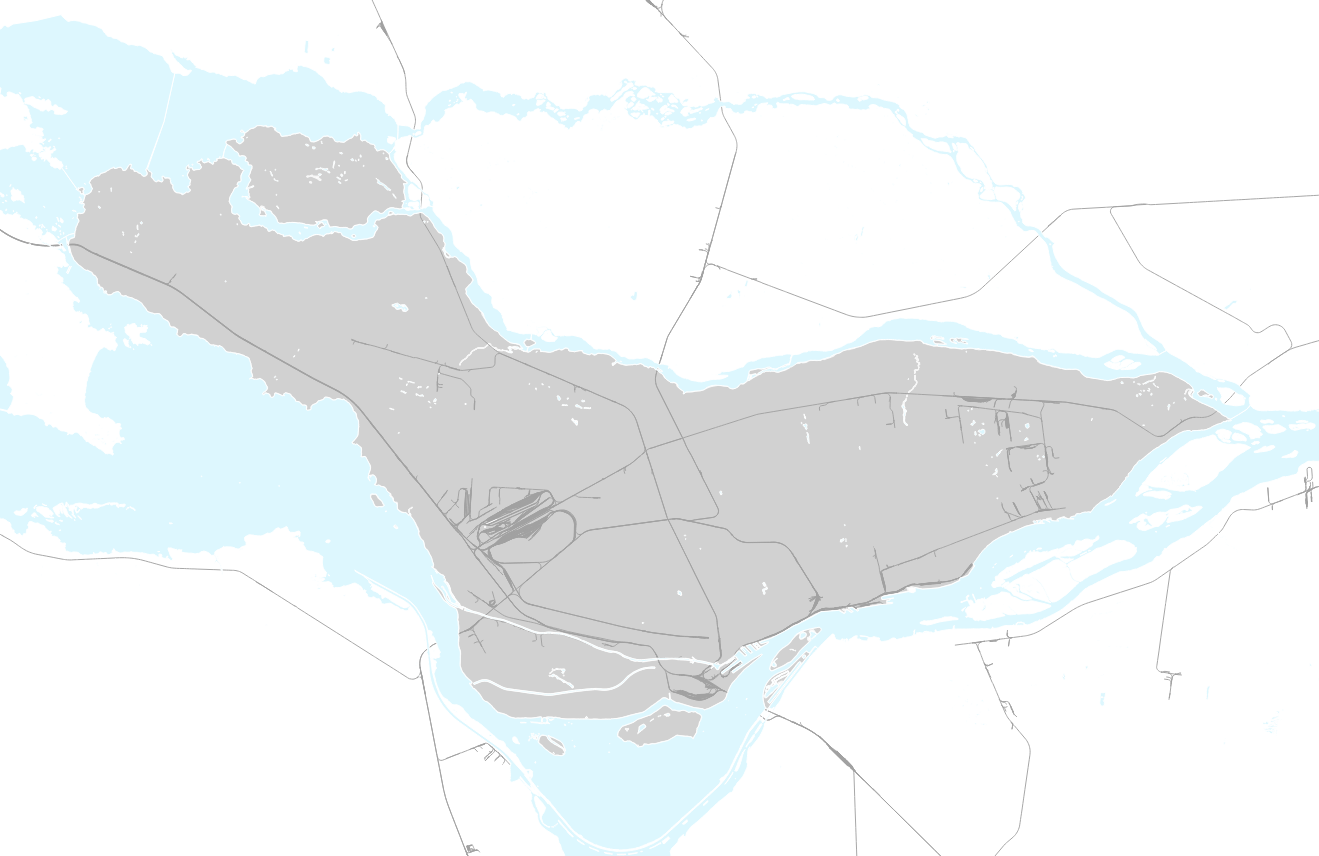
*The island of Montreal (geographic), also known as the Agglomeration of Montreal (political) or the Census subdivision of Montreal (statistical) as seen in QGIS, displaying railroads and waterways and rotated 65°. This is not a map!*


You are skilled: You know Python, Pandas, Frenglish, and more. You are also the only person on board who can do both research and dataviz. Your team needs to publish a report on these issues by springtime... 

You would like to leave them with a tool that they could use in the future with minimal effort (they are also paying you for it with the little money they have!). You take the time to set things up so they can be automated in the future. Like back in NY, your first step is to build a quick data processing pipeline that can handle census data as input and provide useful dataframes prepared for analysis and visualization as output. So you get to work...

### Fetching some population data

You ask a teammate to login to Concordia University Libraries for you... after all, this library system provides access to plenty of data, notably population data for Canada:
- In Concordia Library, search "The Canadian Census Analyser", and click on *VIEW NOW* in the first result. Then select the most recent census year and in the page that follows, click *Profile of Dissemination Areas*.
- First, Locate the [census division](https://www12.statcan.gc.ca/census-recensement/2016/ref/dict/figures/f1_1-eng.cfm) for Montreal from the checkbox (under *M*), 

In the section labeled *Step2*, you will then need to specify your *Census Profile variables for retrieval*. Here, you can select from a great diversity of data tables provided by the Canadian census (click on *-see definitions-* for explanations regarding each field!).

- For the purpose of this exercise, you will be selecting the following:

*Selected items:*
- [x] Population, 2016 (v1)
- [x] [In low income based on the Low-income measure, after tax (LIM-AT) (v2018)](https://www12.statcan.gc.ca/census-recensement/2016/ref/dict/fam021-eng.cfm)
- [x] 0 to 17 years (v2019)
- [x] 18 to 64 years (v2021)
- [x] 65 years and over (v2022)

(Ignore the *vYYYY* as these are clearly a glitch in the website...)

- Finally, as an *output format*, *Download to a file* > ...CSV will open a new tab that provides you with links to (1) a downloadable csv file ready for use and (2) a header file containing a descriptive label for each field.
- Move the downloaded data (**2 files**: one csv and one txt)to your workspace (i.e. this lab exercise's repo). Make sure not to put it in any subdirectories for the sake of this exercise.

Now that we have the data in our workspace, let's import using [glob](https://docs.python.org/3/library/glob.html). [Glob](http://pymotw.com/2/glob/) is a default python module (i.e. no need for installation) that can be useful in cases where you data file names are unpredictable, and especially if you don't want to have to hardcode these arbitrary filenames directly into your Python code (if you did that, you would have to edit your code every time you changed a filename or got new data). To efficiently match with strings, glob uses [UNIX-style pattern matching](https://docs.python.org/3/library/fnmatch.html#module-fnmatch) syntax, which shares some characteristics with regular expressions (regex).

In [15]:
import glob
#here you are using the glob method from inside the glob module you imported
data_filenames = glob.glob('*.[ct][sx][vt]')

#inspect the contents of the variable data_filenames... what do you see?

1. 📝 What does the asterisk symbol in the above command do?


2. 📝 What does the code following the period specifically aim to do?

(Add a Markdown cell below to provide your answers to these questions)

The above code isn't actually very useful to us us right now (but it's worth remembering that these kinds of pattern-matching syntax rules exist!).

3. 📝 modify the string pattern above so that *data_filenames* only fetches filenames for csv files.

You should have now imported your csv file(s). Obviously, you only had one to import, so there isn't really any need to store this in a list as it is being stored now.

In [3]:
data_filename = data_filenames[0]

We're going to be needing pandas to do everything from here on...

4. 📝 In the cell below, import the pandas module and then use the appropriate pandas method to import your csv into a dataframe called *df_pop*.

In [36]:
#your code here

df_pop.head()

,COL0,COL1,pop16,COL3,COL4,COL5,COL6,COL7
0,2466,0,1942044.0,1886481.0,403885.0,81100.0,262435.0,60345.0
1,24660001,1,657.0,NaN,35.0,5.0,20.0,10.0
2,24660002,2,534.0,NaN,25.0,10.0,15.0,0.0
3,24660003,3,303.0,NaN,30.0,5.0,20.0,5.0
4,24660004,4,283.0,NaN,5.0,0.0,5.0,0.0


Below, we can use the dataframe [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) method to rename our columns to something more meaningful. By passing *True* to the inplace keyword argument, we can make the change without assigning the result to a new variable.

In [31]:
#feel free to rename additional columns for your own convenience by adding items to the columns dictionary
df_pop.rename(columns={"COL2": "pop16"}, inplace = True)

## Collecting and extracting spatial features

Now, let's try mapping this table. However, we have no geometries to map them to yet!
- Head to [this page](https://www150.statcan.gc.ca/n1/en/catalogue/92-169-X) and follow the steps to select a *Dissemination Areas* boundary file for the census attribute data you already downloaded. Make sure you are downloading a shapefile (.shp) in the form of a *Cartographic Boundary File*. Note that this should have you download a large compressed folder (.zip).
- Extract / unzip this file package (there are many ways of doing this depending on your computer). You are not expected to be doing this from command line!

Inside, you will find a shapefile containing all dissemination areas in Canada.

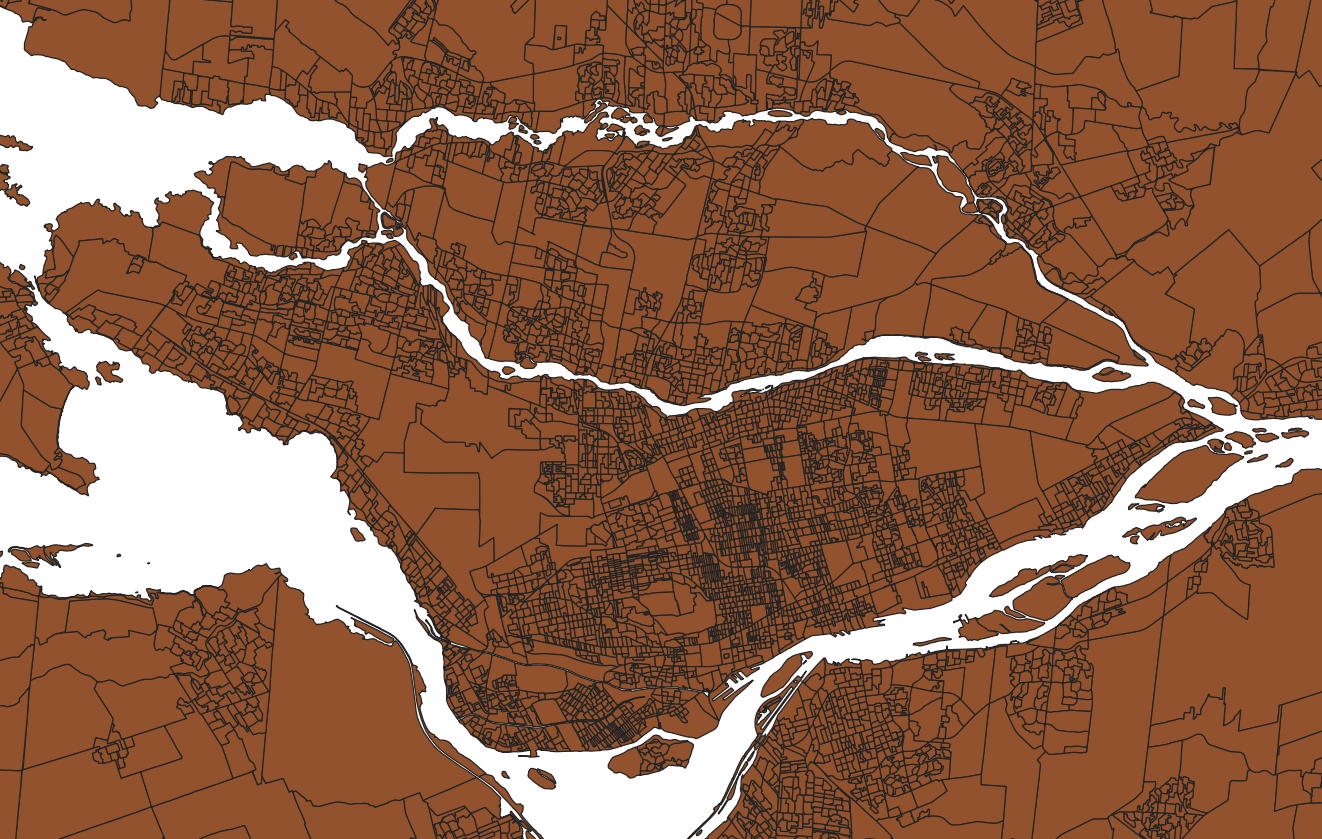
*The shapefile zoomed into the Montreal area as seen in QGIS, rotated 65°. This is not a map!*

5. 📝 Modify the code cell below to import the shapefile into a geopandas dataframe called *gdf_da* using the geopandas [*read_file*](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) method. The operation, when successful, could take a little longer than usual since the file is quite large.

(Note that geopandas is made available to you under the alias *gpd*, and that the .shp filename can be found in the list *geoms_filenames*...)

In [102]:
#to import this shapefile into our Python environment, we will be using geopandas
import geopandas as gpd
#it's good practice to use glob, let's use it here again
#(though we could easily do without since we are not dealing with many files here)
geoms_filenames = glob.glob('*.shp')

#your code here
gdf_da = gpd.read_file(geoms_filenames[0])

gdf_da.head()

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
0,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8976851.149 2149576.543, 8976818.149..."
1,10010245,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977202.180 2150836.794, 8977136.277..."
2,10010246,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977549.383 2150892.566, 8977492.269..."
3,10010247,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977682.314 2151083.183, 8977689.440..."
4,10010248,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8978152.474 2151142.586, 8978040.654..."


6. 📝 The *read_file* method imported all DAs in Canada. What keyword argument(s) from the *read_file* method could you have used to only import what you needed (DAs in Montreal)? What information or data would you have needed for doing it this way?

(Create a Markdown cell below to provide your answer in)

There is an important difference between pandas dataframes and geopandas dataframes. Can you tell what that difference is just by looking at the data? Run the code cell below...

In [ ]:
gdf_da.plot()

7. 📝 What is *gdf_da* projected in? Considering it is a dataset for all of Canada, it is likely a projected coordinate reference system (CRS) that preserves a degree of accuracy for the entire country. See this [reference](https://geopandas.org/en/stable/docs/user_guide/projections.html#upgrading-to-geopandas-0-7-with-pyproj-2-2-and-proj-6) for fetching the crs from a gdf...

Recall the use of square brackets [ ] for selecting elements by position in strings or lists. Recall as well that square brackets [ ] are used to select from a dictionary, however in this case not by position but instead by passing a unique identifier/label (key).

Selecting columns or *subsetting* from a pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) using column headers, as seen in a previous lab, is syntactically identical to selecting objects from a dictionary using keys. For example, df['col1'] will extract column with header 'col1' as a pandas [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) (essentially a one-dimensional dataframe).

But a pandas dataframe is 2-dimensional and can be selected/subset by rows as well: this is especially useful when trimming your data, or creating filters of all kinds to modify specific values in the dataset. The [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) dataframe method will allow you to select by index, using syntax identical to how you would select chatracters from a string or elements from a list. In contrast, [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) works much more like a dictionary (albeit with more power) by allowing you to select rows based on values contained in specific columns.

8. 📝 In the code cell below, use iloc to select the rows that you would otherwise select from *gdf_da* by using .head()

In [140]:
#MITCH remove code
#gdf_da.iloc[:5]

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
0,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8976851.149 2149576.543, 8976818.149..."
1,10010245,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977202.180 2150836.794, 8977136.277..."
2,10010246,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977549.383 2150892.566, 8977492.269..."
3,10010247,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977682.314 2151083.183, 8977689.440..."
4,10010248,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8978152.474 2151142.586, 8978040.654..."


9. 📝 In the code cell below, use iloc to select the rows that you would otherwise select from *gdf_da* by using .tail() (this will take some more thinking... **you are not allowed to use explicit index numbers for the sake of this exercise!**)

In [ ]:
#MITCH remove code below once reviewed... is that too hard?
#gdf_da.iloc[gdf_da.shape[0]-5:]

As you could tell when plotting your gdf, there are clearly too much data in the shapefile you imported. It also makes rendering it heavy on your machine. Let's trim it down to what we need. There are several ways of doing this... One way could be to just select from your gdf based on your knowledge of the data.

10. 📝 What is the census subdivision unit number for Montreal? You can probably find out using a Google search, but this is also made evident by just looking at your census data...

We could use this number to simply select what we need from our gdf. The pandas *loc* method, which is also [available in Geodataframes](https://geopandas.org/en/stable/docs/user_guide/indexing.html), is useful here. *DataFrame.loc* allows you to subset a dataframe based on filter criteria (e.g. *I only want rows whose values are equal to x*).

In [151]:
#let's select a single row from gdf_da using the loc method.
gdf_da.loc[gdf_da['DAUID'] == '10010244']
#above, you are selecting all rows from gdf_da where gdf_da['DAUID'] is equal to '10010244'

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
0,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8976851.149 2149576.543, 8976818.149..."


How would we select a range of values? In this case, values for the subdivision of Montreal? There are several ways we could do this, the simplest of which would be to merge your geodataframe (*gdf_da*) to your dataframe (*df_pop*), which you should already know how to do. If you were to do this, depending on the type of merge you did, any excess, unmatched rows (basically any DA outside of Montreal) wouldn't find a match, and therefore would not appear in your merged dataframe. For the sake of this exercise though, you will first use loc to subset the Montreal DAs from the rest of Canada's DAs.

11. 📝 Select the rows for the Montreal census subdivision using the loc method. You can do this based on the minimum and maximum DA unit value observable in your *df_pop*. Note that there are several steps provided for you to do this in the code cells below.

In [155]:
#the first thing that needs solving is the datatypes. You have to make sure that DAUID (the field containing DA unit identifiers) is a number data type
#the command below shows you your dataframe's data types
df_pop.dtypes

COL0       int64
COL1       int64
pop16    float64
COL3     float64
COL4     float64
COL5     float64
COL6     float64
COL7     float64
dtype: object

The code below turns your DA column into a number data type using [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) dataframe method. It requires a dictionary containing your columns and what you wish to convert them to as input...

In [146]:
to_convert = {'DAUID': 'int64'}
gdf_da = gdf_da.astype(to_convert)

Now that DAUD is a number, you can use mathematical operators (<,>) with loc on it to select the DAs for Montreal. Respond to the question above in the code cell below.

In [154]:
#MITCH DELETE COMMENTED CODE THIS IS FOR YOU, KEEP BOTTOM LINE
#gdf_da_mtl = gdf_da.loc[(gdf_da['DAUID'] >= 24660001) & (gdf_da['DAUID'] <= 24663453)]
gdf_da_mtl = gdf_da.loc[#...]

SyntaxError: unexpected EOF while parsing (2583227787.py, line 3)

12. 📝 In the code cell below, [merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) together *df_pop* and *gdf_da* while taking into consideration the points below:

- Notice that you are **not** being asked to perform this merge using the data you already trimmed in previous steps (*gdf_da_mtl*)! All that work... for nothi- errr, learning! Now, you will basically redo what you did above, but without thinking about any census subdivision numbers. Doing it this way will make your code more automated, since your merge command, if done right, will technically match any Canadian DA geometries to whatever census data you feed it.
- When doing this, note that the order of your positional arguments is important: while pandas and geopandas are very similar and complementary, they provide fundamentally different kinds of dataframes, with the latter providing capabilities for geometry data. If you provide a dataframe as your first argument in the merge command, you will end up with a dataframe as output with unusable geometry information. If you provide a geodataframe as your first argument, then your output will be a geodataframe (this is what we want!). Your control, then, over which table gets joined to which, is primarily through the *how* keyword argument (*left, right, inner, outer* etc.).
- Finally, note that you can always use the help function to show information about any particular class or function in Python. Some might find this more useful than Google searches. You can also pass one of your own functions to help(), if for whatever reason you cannot recall it's required arguments.

In [ ]:
help(pd.merge)

In [215]:
#MITCH DELETE CODE, but maybe leave the variable declaration merged_gdf =  as starter
#merged_gdf = pd.merge(gdf_da, df_pop, how='right', left_on='DAUID', right_on='COL0')

Finally, you should now plot your merged gdf to view it.

In [ ]:
merged_gdf.plot()

Don't things look a little funny? The projection your data is currently in doesn't suit the local context of your data: a projection suited for a continent-sized country will misrepresent and distort features at a local scale. Quebec and the Maritimes can use an MTM system (a subset of UTM) to map their regions, and Montreal falls directly within [MTM zone 8](https://spatialreference.org/ref/epsg/2950/). Using the geopandas [to_crs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html) method, you can reproject your geodata as seen below.

In [217]:
proj_merged_gdf = merged_gdf.to_crs('EPSG:2950')

13. 📝 As your final task, you will make a map of economic precarity. This doesn't have to be a pretty map, but should clearly communicate something at a scale in which it is visible. There are many parameters you can play with in the geodataframe [plot method](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html). Note the following:

- You may need to prepare your data a little more before plotting it, such as by deriving the percentage of each DA considered to be low income. This normalizes your low-income data based on the overall population, and resolves any issue you might have where larger DAs with larger populations inevitably also have low-income populations...
- You will need to tell the plot function what column you would like to visualize.
- You may need to convert several of the columns' data types to numbers in order to allow the plot function to properly interpret them as quantities.
- The code ([fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)) provided in the cell below replaces cells of Nonetype with 0, which will help avoid complications. You can add other columns in which you may wish to also replace Nones with 0s.

In [259]:
to_fill = {"COL4": 0, "pop16": 0}
proj_merged_gdf = proj_merged_gdf.fillna(to_fill)

Text(0.5, 1, 'HERE IS A TITLE')

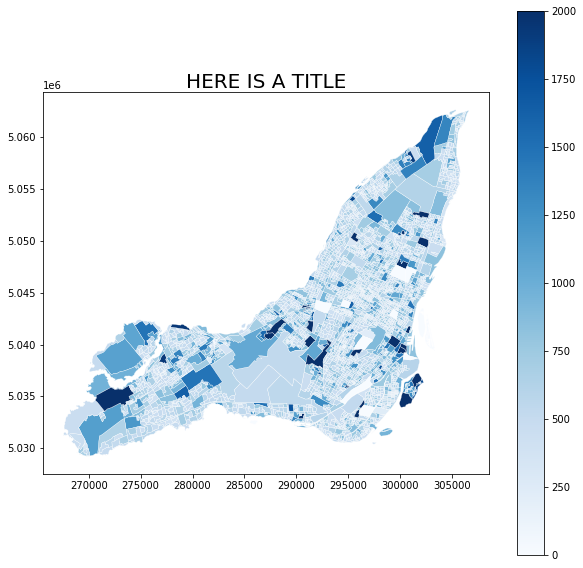

In [263]:
#MITCH I want to provide more example code/parameters in this final step, will return to it before class in early afternoon if possible
#also note the map doesn't make sense becuase I didn't do a step they should do (normalize poverty data by pop)
#they will need to figure certain things out themselves (shrink legend, etc.)

ax = proj_merged_gdf.plot(
    'pop16'
    ,figsize=(10,10)
    ,edgecolor="#fff"
    ,linewidth=0.3
    ,vmax=2000
    ,vmin=0
    ,legend=True
    ,cmap="Blues"
)

ax.annotate(
    "HERE IS A TITLE",
    (0.5,1)
    ,xycoords = 'axes fraction'
    ,horizontalalignment='center'
    ,verticalalignment='bottom'
    ,fontsize = 20
    ,color='#000'
    ,fontstyle='normal'
)

## Deliverables

Complete the 13 questions in this notebook and push.